# Data retrieval

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [4]:
url = 'https://inshorts.com/en/read/technology'

In [5]:
news_data = []

In [6]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'technology']

In [7]:
news_category = news_category[-1]

In [8]:
data = requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [9]:
soup = BeautifulSoup(data.content, 'html.parser')

In [10]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [11]:
news_data.extend(news_articles)
news_data

[{'news_headline': 'Huawei promises to reinvent smartphone photography with P30 Pro',
  'news_article': "Huawei P30 Pro launched in Paris today with a promise to revolutionize smartphone photography. It offers cameras with SuperSpectrum Sensor, an extreme optical SuperZoom lens, a new Time of Flight (TOF) camera, better OIS and AIS image stabilization technology. Seeking to uphold its legacy of innovation, Huawei's P30 Pro is packed with consumer-centric technology, previously unheard of in the industry.",
  'news_category': 'technology'},
 {'news_headline': 'Facebook, Google scientists win $1mn Turing Award for developing AI',
  'news_article': 'Three scientists dubbed the "Godfathers of AI" have won the 2018 Turing Award, which carries a $1-million prize funded by Google. The trio are Facebook Chief AI Scientist Yann LeCun, Google researcher Geoffrey Hinton and Yoshua Bengio from University of Montreal. The scientists have worked for over 30 years on neural networks that power tasks 

In [12]:
df = pd.DataFrame(news_data)

In [13]:
df = df[['news_headline', 'news_article', 'news_category']]

In [14]:
df.head(3)

,news_headline,news_article,news_category
0,Huawei promises to reinvent smartphone photogr...,Huawei P30 Pro launched in Paris today with a ...,technology
1,"Facebook, Google scientists win $1mn Turing Aw...","Three scientists dubbed the ""Godfathers of AI""...",technology
2,"Hyd man's smartphone, bought 2 days ago, explo...",A 25-year-old man's Oppo A5 exploded in his po...,technology


# Prepare user defined function to extract data from inshorts.com

In [18]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [19]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [20]:
news_df = datasetPrepare(urls_list)

In [21]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
news_headline    74 non-null object
news_article     74 non-null object
news_category    74 non-null object
dtypes: object(3)
memory usage: 1.8+ KB


In [22]:
news_df.head(5)

,news_headline,news_article,news_category
0,Huawei promises to reinvent smartphone photogr...,Huawei P30 Pro launched in Paris today with a ...,technology
1,US charges Facebook over racial discrimination...,The US Department of Housing and Urban Develop...,technology
2,Tesla says it built Asia's largest energy stor...,Elon Musk-led Tesla said it has built Asia's l...,technology
3,Google's Pichai said he's committed to US mili...,Following a meeting with Google CEO Sundar Pic...,technology
4,"After Tim Apple, Trump calls Google CEO Pichai...",Days after referring to Apple CEO Tim Cook as ...,technology


In [23]:
news_df.news_category.value_counts()

technology    25
world         25
sports        24
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

In [24]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [25]:
nlp = spacy.load('en')

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [28]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [29]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [30]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [31]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [32]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [33]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [34]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [35]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [36]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [37]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [38]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': "US charges Facebook over racial discrimination in housing ads. The US Department of Housing and Urban Development (HUD) has charged Facebook for violating the Fair Housing Act by encouraging, enabling and causing housing discrimination in advertising on its platforms. HUD is seeking damages for any person harmed by Facebook's advertising systems, which allowed employers and landlords to limit audiences on the basis of race, ethnicity and gender.",
 'clean_text': 'us charge facebook racial discrimination housing ad us department housing urban development hud charge facebook violate fair housing act encourage enable cause housing discrimination advertising platform hud seek damage person harm facebook advertising system allow employer landlord limit audience basis race ethnicity gender'}

# Save the news articles

In [39]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [40]:
news_df = pd.read_csv('news.csv')

In [41]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [42]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,US,NNP,PROPN
1,charges,VBZ,VERB
2,Facebook,NNP,PROPN
3,over,IN,ADP
4,racial,JJ,ADJ
5,discrimination,NN,NOUN
6,in,IN,ADP
7,housing,NN,NOUN
8,ads,NNS,NOUN


In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Narayana_GLB\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [49]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [50]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,US,NN
1,charges,NNS
2,Facebook,NNP
3,over,IN
4,racial,JJ
5,discrimination,NN
6,in,IN
7,housing,NN
8,ads,NNS


# Named Entity Recognition

In [60]:
sentence = str(news_df.iloc[1].full_text)

In [63]:
sentence

"US charges Facebook over racial discrimination in housing ads. The US Department of Housing and Urban Development (HUD) has charged Facebook for violating the Fair Housing Act by encouraging, enabling and causing housing discrimination in advertising on its platforms. HUD is seeking damages for any person harmed by Facebook's advertising systems, which allowed employers and landlords to limit audiences on the basis of race, ethnicity and gender."

In [67]:
sentence_nlp = nlp(sentence)

In [68]:
sentence_nlp

US charges Facebook over racial discrimination in housing ads. The US Department of Housing and Urban Development (HUD) has charged Facebook for violating the Fair Housing Act by encouraging, enabling and causing housing discrimination in advertising on its platforms. HUD is seeking damages for any person harmed by Facebook's advertising systems, which allowed employers and landlords to limit audiences on the basis of race, ethnicity and gender.

In [70]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(US, 'GPE'), (The, 'ORG'), (US, 'ORG'), (Department, 'ORG'), (of, 'ORG'), (Housing, 'ORG'), (and, 'ORG'), (Urban, 'ORG'), (Development, 'ORG'), (HUD, 'ORG'), (the, 'LAW'), (Fair, 'LAW'), (Housing, 'LAW'), (Act, 'LAW'), (HUD, 'ORG'), (Facebook, 'PERSON')]


In [71]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [72]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,Google,China,India,Trump,Pakistan,Apple,first,KXIP,two,six,KKR,IPL,Afghanistan,Pichai
Entity Type,GPE,ORG,GPE,GPE,ORG,GPE,ORG,ORDINAL,ORG,CARDINAL,CARDINAL,ORG,ORG,GPE,GPE
Frequency,36,17,15,15,9,8,8,8,8,8,7,7,7,6,6


In [73]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,ORG,PERSON,GPE,CARDINAL,DATE,NORP,ORDINAL,LOC,MONEY,PRODUCT,WORK_OF_ART,LAW,TIME,PERCENT,FAC
Frequency,214,153,137,82,65,44,21,13,8,7,4,2,1,1,1


# Emotion and Sentiment Analysis

In [74]:
from afinn import Afinn

In [75]:
af = Afinn()

In [76]:
sentiment_scores = [af.score(article) for article in corpus]

In [77]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [78]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [79]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [80]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [81]:
df.groupby(by=['news_category']).describe()

sentiment_score                                                 
                        count      mean       std   min   25%  50%   75%   max
news_category                                                                 
sports                   24.0  2.416667  5.800425 -10.0 -1.25  2.5  5.25  12.0
technology               25.0 -0.280000  6.400000 -10.0 -5.00  0.0  4.00  14.0
world                    25.0 -1.920000  5.801724 -17.0 -5.00  0.0  2.00   6.0

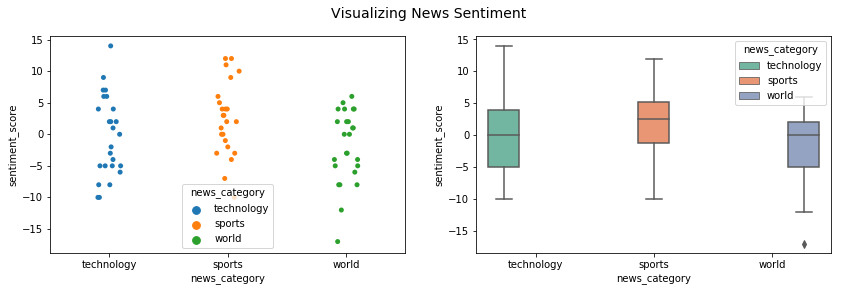

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


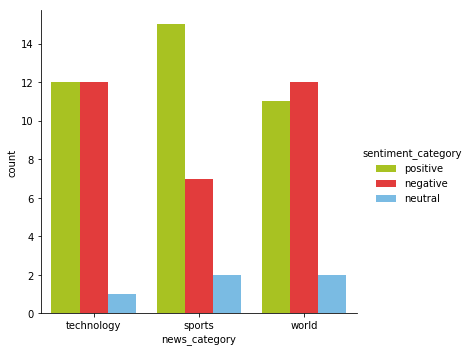

In [83]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [87]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 2)].index[0]

In [89]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -2)].index[0]

In [90]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Elon Musk-led Tesla said it has built Asia's largest energy storage system at Osaka train station in Japan. The 7 MWh system with 42 Powerpack battery units can provide energy to move a train and its passengers for up to 30 minutes to the nearest station during a power failure, Tesla said, adding its hardware was installed in two days.

Most Positive Tech News Article: Facebook is introducing a new feature, 'Candidate Connect', to let 2019 Lok Sabha election candidates make 20-second videos to connect with voters. In the videos, to be grouped by constituencies, candidates will answer a set of questions, which Facebook said are outcomes of local consumer research. The videos will appear at the top of a user's 'News Feed'.


In [100]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([ -4.,   4.,  -8.,   1.,   6.,  -3.,   0., -12.,   5.,   2.,  -5.,
       -17.,  -6.])

In [101]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 4)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -4.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: Pakistan has said it has examined the 22 pin locations of alleged training camps shared by India and said no such camps exist. "Pakistan is willing to allow visits, on request, to these locations," the statement added. It also stated that 54 people are being probed in connection with the Pulwama attack, but no link has been found so far.

Most Positive World News Article: The US Ambassador to Afghanistan, John R Bass, has criticised Pakistan PM Imran Khan over his comments suggesting Afghanistan should set up an interim government to facilitate US-Taliban talks. "Some aspects of cricket apply well in diplomacy, some do not. [It's] important to resist the temptation to ball-tamper with the Afghanistan peace process and its internal affairs," Bass tweeted.


In [102]:
from textblob import TextBlob

In [103]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [104]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [105]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                  \
                        count      mean       std   min    25%    50%     75%   
news_category                                                                   
sports                   24.0  0.109833  0.264403 -0.60  0.037  0.100  0.2525   
technology               25.0  0.079640  0.160765 -0.25 -0.019  0.067  0.1500   
world                    25.0  0.010960  0.199371 -0.80 -0.044  0.050  0.0830   

                      
                 max  
news_category         
sports         0.767  
technology     0.533  
world          0.350

In [106]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,0.069,positive
1,technology,0.533,positive
2,technology,-0.040,negative
3,technology,-0.025,negative
4,technology,0.053,positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


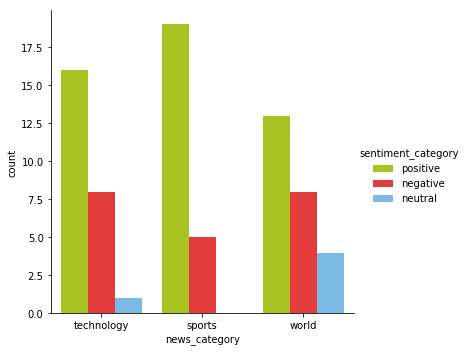

In [107]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [108]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: The US Ambassador to Afghanistan, John R Bass, has criticised Pakistan PM Imran Khan over his comments suggesting Afghanistan should set up an interim government to facilitate US-Taliban talks. "Some aspects of cricket apply well in diplomacy, some do not. [It's] important to resist the temptation to ball-tamper with the Afghanistan peace process and its internal affairs," Bass tweeted.

Most Positive World News Article: Pakistan has said it has examined the 22 pin locations of alleged training camps shared by India and said no such camps exist. "Pakistan is willing to allow visits, on request, to these locations," the statement added. It also stated that 54 people are being probed in connection with the Pulwama attack, but no link has been found so far.


In [109]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

D:\courses\PGPAIML\statisticalNLP\aimlBlrSept2018\model_evaluation_utils.py:76: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
D:\courses\PGPAIML\statisticalNLP\aimlBlrSept2018\model_evaluation_utils.py:78: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


Predicted:                 
                   negative neutral positive
Actual: negative         14       2       15
        neutral           0       1        4
        positive          7       2       29